In [1]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
shots = 256

# Load local account information
#IBMQ.save_account('cdad9ef01fbad88f5ee99fa7fc4cfb7b5eb8755c52fd1697690c6b680797a57384a80d5a6bfd5e99332b8ee8a58e74e3903034a7f4c19eb9d29b9e3da35aff0d')
IBMQ.load_account()

C:\Users\user\Downloads\anaconda\envs\IBMQ\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [38]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.providers.ibmq import least_busy
from qiskit.quantum_info import Statevector
from numpy import pi

# importing Qiskit
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor

# import basic plot tools
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [39]:
# Problem 4

In [40]:
# Step 1

In [41]:
def c_amod15(a, power):
    """Controlled multiplication by a mod 15"""
    if a not in [2,7,8,11,13]:
        raise ValueError("'a' must be 2,7,8,11 or 13")
    U = QuantumCircuit(4)
    for iteration in range(power):
        if a in [2,13]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [7,8]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a == 11:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                U.x(q)
    U = U.to_gate()
    U.name = "%i^%i mod 15" % (a, power)
    c_U = U.control()
    return c_U

In [42]:
# Create QuantumCircuit with n_count counting qubits plus 4 qubits for U to act on n_count = 8 # number of counting qubits
n_count = 8
# a variable that can be adjusted later
a = 7
# The first 8-qubit register for storing x
qr1 = QuantumRegister(n_count, name="q1")
# The second 4-qubit register for storing f(x)
qr2 = QuantumRegister(4, name="q2")
cr1 = ClassicalRegister(n_count, name="c1")
cr2 = ClassicalRegister(4, name="c2")

qc = QuantumCircuit(qr1, qr2, cr1, cr2)

# Initialize counting qubits in uniform superposition
for q in range(n_count):
    qc.h(q)
    
# And ancilla register in state |1>
qc.x(3+n_count)

# Do controlled-U operations
for q in range(n_count):
    qc.append(c_amod15(a, 2**q), [q] + [i+n_count for i in range(4)])

In [43]:
# Step 2

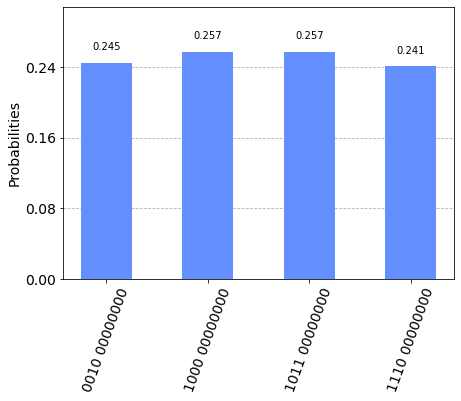

In [44]:
qc.measure(qr2, cr2)
backend = Aer.get_backend('qasm_simulator')
results = execute(qc, backend=backend, shots=1024).result()
answer = results.get_counts()
plot_histogram(answer)

In [45]:
# Step 3

In [82]:
# Create QuantumCircuit with n_count counting qubits plus 4 qubits for U to act on n_count = 8 # number of counting qubits
n_count = 8
# a variable that can be adjusted later
a = 7
# The first 8-qubit register for storing x
qr1 = QuantumRegister(n_count, name="q1")
# The second 4-qubit register for storing f(x)
qr2 = QuantumRegister(4, name="q2")
cr1 = ClassicalRegister(n_count, name="c1")
cr2 = ClassicalRegister(4, name="c2")

qc = QuantumCircuit(qr1, qr2, cr1, cr2)

# Initialize counting qubits in uniform superposition
for q in range(n_count):
    qc.h(q)
    
# And ancilla register in state |1>
qc.x(3+n_count)

# Do controlled-U operations
for q in range(n_count):
    qc.append(c_amod15(a, 2**q), [q] + [i+n_count for i in range(4)])

Max:  11
min:  1
Delta:  1.0
Total data numbers:  251


<BarContainer object of 11 artists>

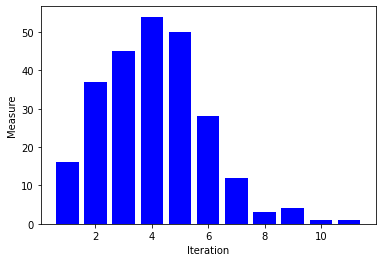

In [83]:
qc.measure(qr1, cr1)
backend = Aer.get_backend('qasm_simulator')
results = execute(qc, backend=backend, shots=1024).result()
answer = results.get_counts()

# Uniform
maxi, mini = -1, 2**8
for i in answer:
    if (answer[i] > maxi): maxi = answer[i]
    elif (answer[i] < mini): mini = answer[i]
print("Max: ", maxi)
print("min: ", mini)

delta = (maxi - mini)/10
print("Delta: ", delta)
print("Total data numbers: ", len(answer))

lis = [0]*11
for i in answer:
    lis[int((answer[i]-mini)/delta)] += 1
        
# Plot
plt.xlabel("Iteration")
plt.ylabel("Measure")

ite = []
for i in range(11): ite.append(mini+i*delta)
    
plt.bar(ite, lis, color='blue')

In [27]:
# Step 4

In [47]:
def qft_dagger(n):
    """n-qubit QFTdagger the first n qubits in circ"""
    qc = QuantumCircuit(n)
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cu1(-np.pi/float(2**(j-m)), m, j)
        qc.h(j)
    qc.name = "QFT†"
    return qc

In [48]:
# Create QuantumCircuit with n_count counting qubits plus 4 qubits for U to act on n_count = 8 # number of counting qubits
n_count = 8
# a variable that can be adjusted later
a = 7
qc = QuantumCircuit(n_count + 4, n_count)

# Initialize counting qubits in uniform superposition
for q in range(n_count):
    qc.h(q)
    
# And ancilla register in state |1>
qc.x(3+n_count)

# Do controlled-U operations
for q in range(n_count):
    qc.append(c_amod15(a, 2**q), [q] + [i+n_count for i in range(4)])

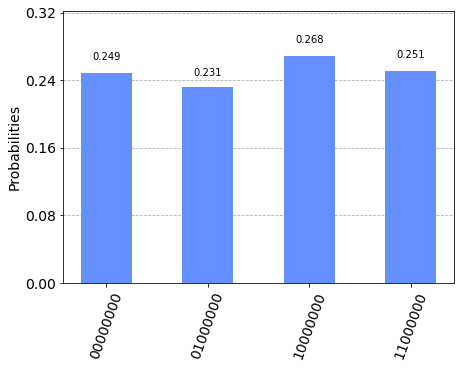

In [35]:
# Do inverse-QFT
qc.append(qft_dagger(n_count), range(n_count))

# Measure circuit
qc.measure(range(n_count), range(n_count))

backend = Aer.get_backend('qasm_simulator')
results = execute(qc, backend, shots=2048).result()
counts = results.get_counts()
plot_histogram(counts)

In [36]:
# Step 5

In [49]:
import pandas as pd
from fractions import Fraction

rows, measured_phases = [], []
for output in counts:
    decimal = int(output, 2) # Convert (base 2) string to decimal
    phase = decimal/(2**n_count) # Find corresponding eigenvalue
    measured_phases.append(phase)
for phase in measured_phases:
    frac = Fraction(phase).limit_denominator(15)
    rows.append([phase, "%i/%i" % (frac.numerator, frac.denominator), frac.denominator])

# Print as a table
headers=["Phase", "Fraction", "Guess for r"]
df = pd.DataFrame(rows, columns=headers)
print(df)

   Phase Fraction  Guess for r
0   0.00      0/1            1
1   0.25      1/4            4
2   0.50      1/2            2
3   0.75      3/4            4
